In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
train_dir = 'I:/Data_Science/Project/Samosa_burger/Dataset/Train'
test_dir = 'I:/Data_Science/Project/Samosa_burger/Dataset/Test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 2829 images belonging to 2 classes.
Found 252 images belonging to 2 classes.


##### I would like to use CNN Model Archi.

In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) 

i:\Data_Science\Project\Samosa_burger\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=25
)

i:\Data_Science\Project\Samosa_burger\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/step - accuracy: 0.6275 - loss: 0.6796

i:\Data_Science\Project\Samosa_burger\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 59s 649ms/step - accuracy: 0.6287 - loss: 0.6777 - val_accuracy: 0.7991 - val_loss: 0.4798
Epoch 2/25
 1/88 ━━━━━━━━━━━━━━━━━━━━ 38s 438ms/step - accuracy: 0.9062 - loss: 0.2825

i:\Data_Science\Project\Samosa_burger\myenv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9062 - loss: 0.2825 - val_accuracy: 0.8170 - val_loss: 0.4457
Epoch 3/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 42s 473ms/step - accuracy: 0.8654 - loss: 0.3450 - val_accuracy: 0.8482 - val_loss: 0.3378
Epoch 4/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9062 - loss: 0.2102 - val_accuracy: 0.8705 - val_loss: 0.3106
Epoch 5/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 42s 472ms/step - accuracy: 0.8945 - loss: 0.2624 - val_accuracy: 0.8929 - val_loss: 0.2509
Epoch 6/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8750 - loss: 0.2402 - val_accuracy: 0.8929 - val_loss: 0.2465
Epoch 7/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 42s 472ms/step - accuracy: 0.9157 - loss: 0.2224 - val_accuracy: 0.8795 - val_loss: 0.2918
Epoch 8/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8750 - loss: 0.2101 - val_accuracy: 0.8750 - val_loss: 0.3041
Epoch 9/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 469ms/step - accuracy: 0.9279 - loss: 0.2036 - val_accuracy: 0.9286 - val_los

In [7]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Accuracy is good because i use Small Dataset

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9408 - loss: 0.1740
Test Accuracy: 91.27%


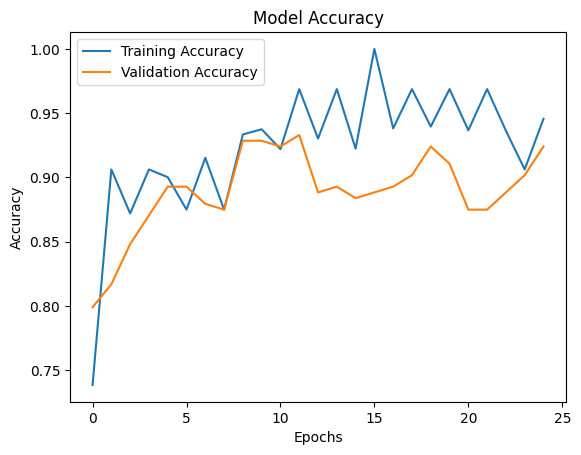

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Here, training accuracy is fluctuating a lot but is higher than validation accuracy in most cases.
# The validation accuracy also has a lot of ups and downs.

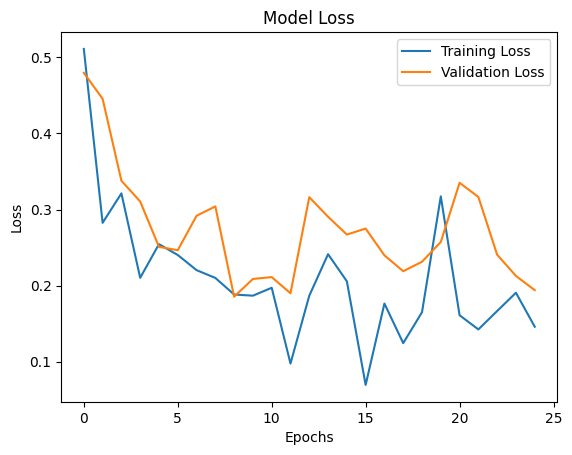

In [9]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Here The validation loss graph shows fluctuations, meaning the model is unstable.
# validation loss is spiking at different points, which suggests overfitting or noisy data.

In [7]:
model.save('samosa_burger_classifier.h5')

#### Testing

In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('samosa_burger_classifier.h5')

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    class_labels = ['burger', 'samosa']
    predicted_class = class_labels[np.argmax(predictions)]
    probabilities = np.round(predictions[0].max() * 100, 4)

    return predicted_class, probabilities


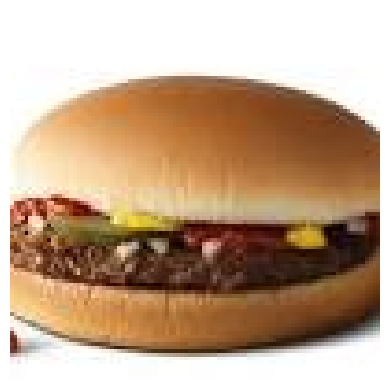

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Class: burger, Probabilities: 99.9976 %


In [54]:
img_path = 'I:/Data_Science/Project/Samosa_burger/Dataset/Test/Burger/Burger-Test (3).jpeg'
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()
predicted_class, probabilities = predict_image(img_path)
print(f'Predicted Class: {predicted_class}, Probabilities: {probabilities} %')

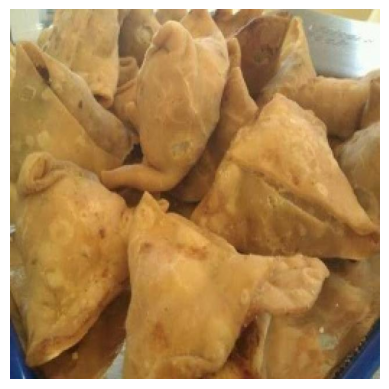

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Class: samosa, Probabilities: 99.6082 %


In [55]:
img_path = 'I:/Data_Science/Project/Samosa_burger/Dataset/Test/Samosa/XBOHPGS0I4XB_jpg.rf.90e0335d49db6eb78c571d2b880ec93d.jpg'
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()
predicted_class, probabilities = predict_image(img_path)
print(f'Predicted Class: {predicted_class}, Probabilities: {probabilities} %')

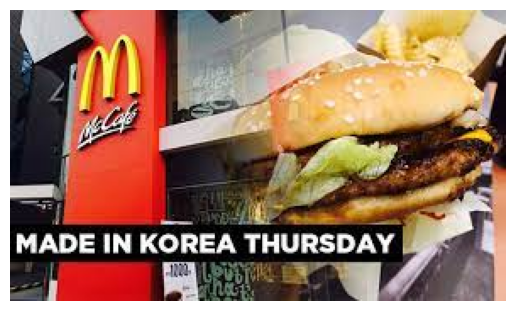

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Class: burger, Probabilities: 100.0 %


In [57]:
img_path = 'I:/Data_Science/Project/Samosa_burger/Dataset/Test/Burger/Burger-Test (6).jpeg'
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()
predicted_class, probabilities = predict_image(img_path)
print(f'Predicted Class: {predicted_class}, Probabilities: {probabilities} %')

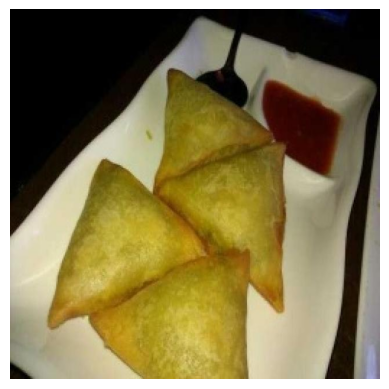

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Class: samosa, Probabilities: 99.9912 %


In [58]:
img_path = 'I:/Data_Science/Project/Samosa_burger/Dataset/Test/Samosa/Z0S02B8PV13S_jpg.rf.63bdc905cd2a411ca0cfbe7017e0a8ab.jpg'
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()
predicted_class, probabilities = predict_image(img_path)
print(f'Predicted Class: {predicted_class}, Probabilities: {probabilities} %')